# **1.) Data Exploration:**

# **a.) Load the dataset and perform exploratory data analysis (EDA).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Titanic_train.csv')
test=pd.read_csv('Titanic_test.csv')

In [3]:
print('==Training Data-First 5 rows==')
display(train.head())
print('==Testing Data-First 5 rows==')
display(test.head())

==Training Data-First 5 rows==


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


==Testing Data-First 5 rows==


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print('Training data shape:',train.shape)
print('Test data shape:',test.shape)

Training data shape: (891, 12)
Test data shape: (418, 11)


# **b.) Examine the features, their types, and summary statistics.**

In [5]:
print('==Numeric Features==')
display(pd.DataFrame(train.select_dtypes(include='number')))

==Numeric Features==


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [6]:
print('==Categorical Columns==')
display(pd.DataFrame(train.select_dtypes(include='object')))

==Categorical Columns==


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [7]:
print('==Summary Statistics==')
display(train.describe())

==Summary Statistics==


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **c) Visualizations**

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlation Heatmap-numeric features')

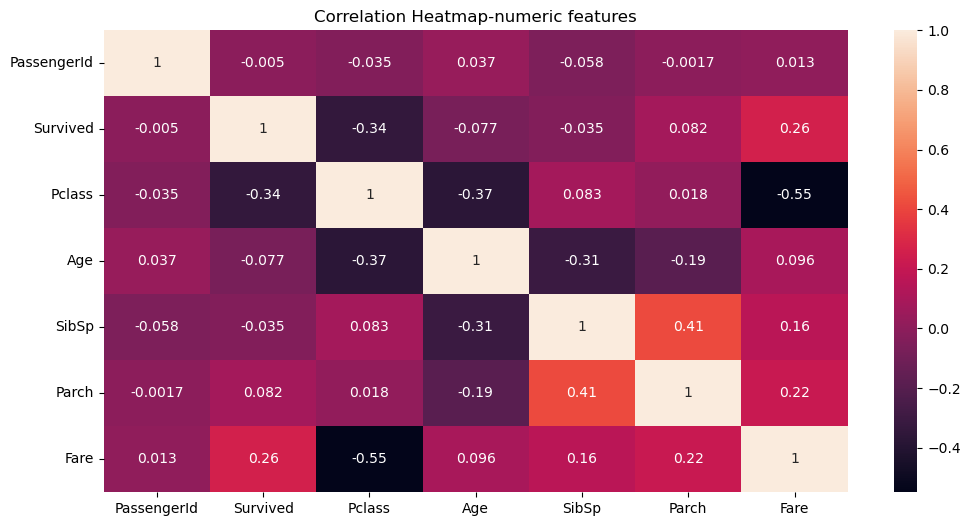

In [8]:
#correlation between numeric features
num_col=train.select_dtypes(include=['number']).columns.tolist()
corr=train[num_col].corr()
display(corr)

plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap-numeric features')

Text(0.5, 1.0, 'Sex vs Survived')

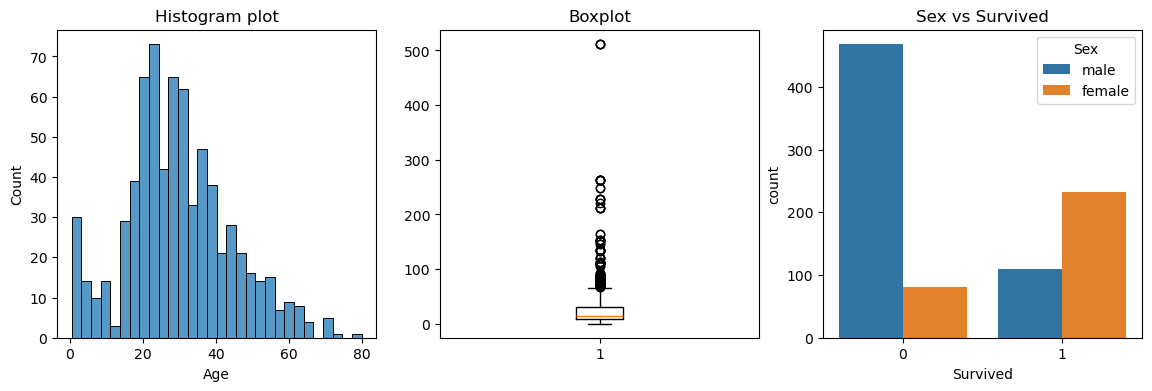

In [9]:
#Histogram Plot
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(train['Age'],bins=30)
plt.title('Histogram plot')

# Boxplot
plt.subplot(1,3,2)
plt.boxplot(train['Fare'])
plt.title('Boxplot')

# Countplot
plt.subplot(1,3,3)
sns.countplot(x='Survived',hue='Sex',data=train)
plt.title('Sex vs Survived')

# **2.) Data Preprocessing:**

# a.) Handle missing values

In [10]:
#Handling missing values
display('Training-missing values',train.isnull().sum().sort_values(ascending=True))
display('Testing-missing values',test.isnull().sum().sort_values(ascending=True))

'Training-missing values'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

'Testing-missing values'

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

In [11]:
train["Age"].fillna(train["Age"].median(), inplace=True)
test['Age'].fillna(train['Age'].median(), inplace=True)

In [12]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(train['Fare'].median(), inplace=True)

In [13]:
train.drop(columns=['Name','Cabin','Ticket'],inplace=True)
test.drop(columns=['Name','Cabin','Ticket'],inplace=True)

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
#why we dont did imputation?can we use fillna check

# b.) Encode categorical variables.

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
for col in ['Sex','Embarked']:
    le=LabelEncoder()
    train[col]=le.fit_transform(train[col])
    test[col]=le.transform(test[col])

In [20]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [21]:
# Seperating Features and Target
train_features=train.drop(columns=['Survived','PassengerId'])
train_target=train[['Survived']]

In [22]:
#traintestsplit
from sklearn.model_selection import train_test_split 
x_train,x_val,y_train,y_val=train_test_split(train_features,train_target,train_size=0.8,random_state=35,stratify=train_target)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 7)
(179, 7)
(712, 1)
(179, 1)


In [23]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train[['Age','Fare']]=min_max.fit_transform(x_train[['Age','Fare']])
x_val[['Age','Fare']]=min_max.transform(x_val[['Age','Fare']])

# **3.) Model Building:**

# a.) Build a logistic regression model 
# b.) Train the model using the training data.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_val)
accuracy_score(y_val,y_pred)

0.8379888268156425

# **4.) Model Evaluation:**

# a.) Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.87      0.68      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [27]:
#Roc curve
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob=log_model.predict_proba(x_val)[:,1]
roc_acc=roc_auc_score(y_val,y_pred_prob)
roc_acc

np.float64(0.872266139657444)

# Visualization of ROC curve.

In [28]:
fpr,tpr,thresholds=roc_curve(y_val,y_pred_prob)
print('False Positive Rate:',fpr)
print('True Positive Rate',tpr)
print('Thresholds',thresholds)

False Positive Rate: [0.         0.         0.         0.         0.00909091 0.00909091
 0.01818182 0.01818182 0.02727273 0.02727273 0.03636364 0.03636364
 0.06363636 0.06363636 0.08181818 0.08181818 0.1        0.11818182
 0.11818182 0.13636364 0.14545455 0.14545455 0.16363636 0.16363636
 0.17272727 0.17272727 0.20909091 0.22727273 0.24545455 0.24545455
 0.26363636 0.29090909 0.30909091 0.30909091 0.33636364 0.33636364
 0.37272727 0.37272727 0.43636364 0.43636364 0.65454545 0.67272727
 0.67272727 0.69090909 0.70909091 0.73636364 0.75454545 0.8
 0.8        0.91818182 0.93636364 0.93636364 0.98181818 1.        ]
True Positive Rate [0.         0.01449275 0.04347826 0.42028986 0.42028986 0.47826087
 0.47826087 0.52173913 0.52173913 0.53623188 0.57971014 0.66666667
 0.66666667 0.68115942 0.68115942 0.69565217 0.69565217 0.69565217
 0.71014493 0.71014493 0.71014493 0.7826087  0.7826087  0.79710145
 0.79710145 0.8115942  0.8115942  0.8115942  0.8115942  0.82608696
 0.82608696 0.82608696 0.826

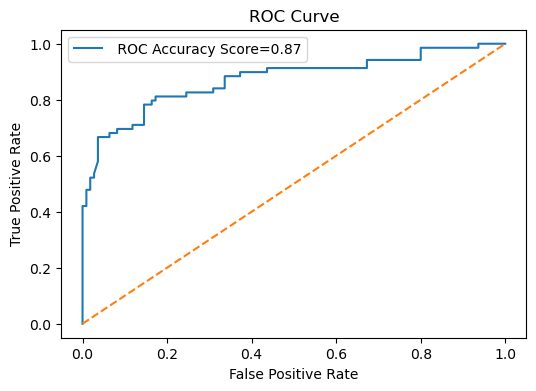

In [29]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f' ROC Accuracy Score={roc_acc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# **5.) Interpretation:**

# a. Interpret the coefficients of the logistic regression model.

In [30]:
coefficients=log_model.coef_[0] 

In [31]:
pd.DataFrame({'features':train_features.columns,
              'coefficient':coefficients,
              'Odds Ratio':np.exp(coefficients)
             }).sort_values(by='coefficient',ascending=False)

,features,coefficient,Odds Ratio
5,Fare,0.716717,2.047700
4,Parch,-0.118382,0.888357
6,Embarked,-0.183201,0.832601
3,SibSp,-0.219711,0.802751
0,Pclass,-1.039506,0.353629
1,Sex,-2.456560,0.085729
2,Age,-2.459609,0.085468


# **6.) Deployment with Streamlit:**

In [32]:
import pickle

In [33]:
file='log19.pkl'

In [34]:
pickle.dump(log_model,open(file,'wb'))

In [35]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

# **MODEL TRAINED SUCCESSFULLY.** Deployment is in file Tharun_Titanic_app.py

# **Interview Questions**

# 1.) What is the difference between precision and recall?

Presision:- Precision measures how many of the predicted positive results are actually correct.
It focuses on accuracy of positive predictions.

Recall :- Recall measures how many of the actual positive cases are correctly identified by the model.
It focuses on finding all positive cases.

# 2.) What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to evaluate a model by splitting the dataset into multiple parts, training the model on some parts and testing it on the remaining parts. This process is repeated several times so that every part of the data is used for testing once.And it is important in binary classification because it provides a more reliable evaluation of model performance and helps prevent overfitting.